### Let's look at an example of Poisson's equation

$$\frac{d^2 \theta}{dx^2} + \frac{d^2 \theta}{dy^2} = 0 $$

For the following BC:
$\theta_{x=0} = 1$

The Discretized form of the equation is:
$$\frac{\theta_{(i-1),j} - 2\theta_{i,j} + \theta_{(i+1),j}}{\Delta x^2} + \frac{\theta_{i,(j-1)} - 2\theta_{i,j} + \theta_{i,(j+1)}}{\Delta y^2} = 0 $$

Writing the same in the traditional way with loops would produce the following function:

In [6]:
def compute_Poissons_looped(N=100):
    theta = np.zeros((N,N))
    
    dx = 1./float(N)
    
    
    theta[:,0] = 1.
    counter = 0
    while(counter < 10):
        for i in range(1,N-1,1):
            for j in range(1,N-1, 1):
                theta[i,j] = (theta[i,j+1] + theta[i,j-1] + theta[i+1,j] + theta[i-1,j]) * 0.25
        counter+=1
            

In [7]:
#%%timeit
import time
start = time.time()
compute_Poissons_looped(N=500)
print( "total time elapsed = "+str(time.time() - start))

total time elapsed = 1.9456095695495605


In [8]:
import numpy as np
def compute_Poissons_vectorized(N=10000):
    theta = np.zeros((N,N))
    dx = 1./float(N)
    theta[:,0] = 1.
    counter = 0
    while(counter<10):
        theta[1:-1,1:-1] = (theta[1:-1, 2:] + theta[1:-1, :-2] + theta[2:, 1:-1] + theta[:-2, 1:-1] ) * 0.25
        counter+=1
        
    return theta

In [9]:
start = time.time()
compute_Poissons_vectorized(N=10000)
print( "total time elapsed = "+str(time.time() - start))

total time elapsed = 5.309730768203735


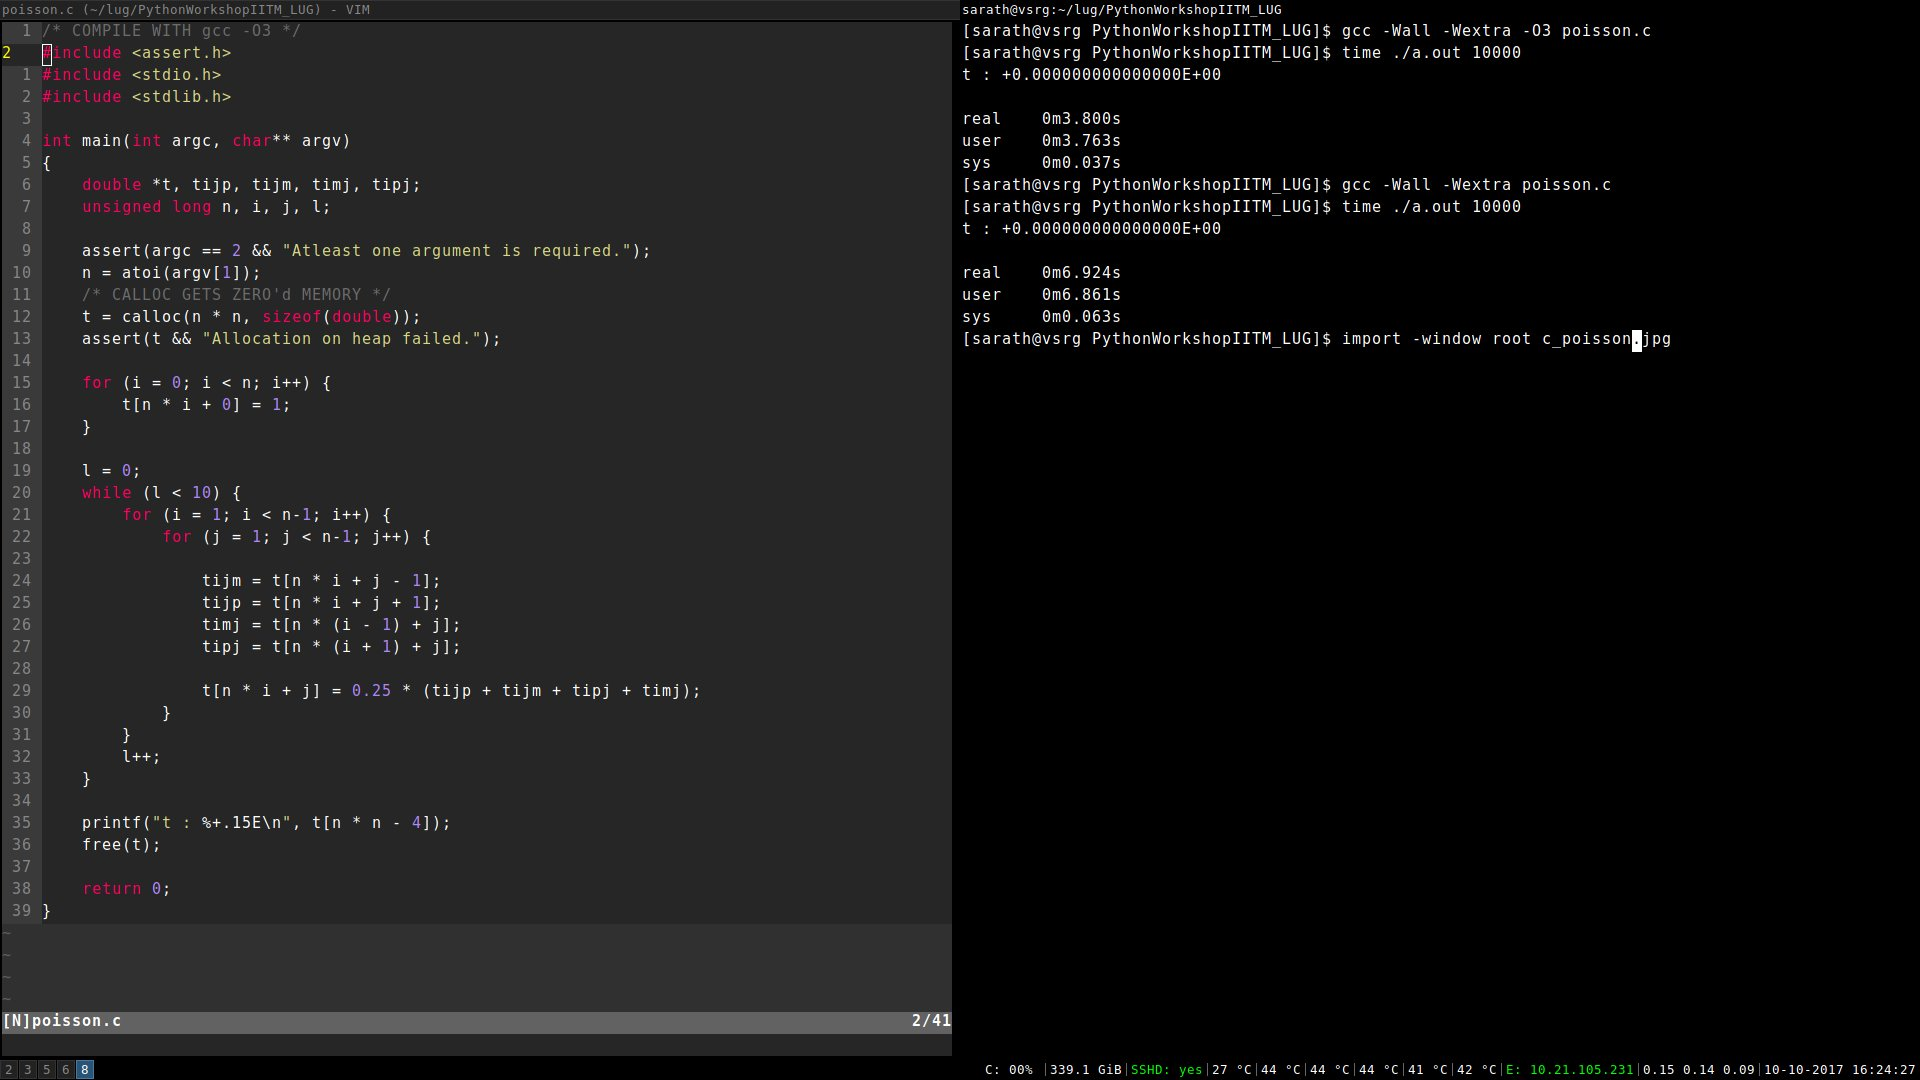

In [1]:
from IPython.display import Image
Image("c_poisson.jpg")

In [4]:
"For n=10000 The C code with -O3 takes 3.8s and without -O3 takes 6.924s and numpy takes 5.3s"

'For n=10000 The C code with -O3 takes 3.8s and without -O3 takes 6.924s and numpy takes 5.3s'